In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(0,50,501)
y = np.sin(x)

In [3]:
x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [4]:
y

array([ 0.00000000e+00,  9.98334166e-02,  1.98669331e-01,  2.95520207e-01,
        3.89418342e-01,  4.79425539e-01,  5.64642473e-01,  6.44217687e-01,
        7.17356091e-01,  7.83326910e-01,  8.41470985e-01,  8.91207360e-01,
        9.32039086e-01,  9.63558185e-01,  9.85449730e-01,  9.97494987e-01,
        9.99573603e-01,  9.91664810e-01,  9.73847631e-01,  9.46300088e-01,
        9.09297427e-01,  8.63209367e-01,  8.08496404e-01,  7.45705212e-01,
        6.75463181e-01,  5.98472144e-01,  5.15501372e-01,  4.27379880e-01,
        3.34988150e-01,  2.39249329e-01,  1.41120008e-01,  4.15806624e-02,
       -5.83741434e-02, -1.57745694e-01, -2.55541102e-01, -3.50783228e-01,
       -4.42520443e-01, -5.29836141e-01, -6.11857891e-01, -6.87766159e-01,
       -7.56802495e-01, -8.18277111e-01, -8.71575772e-01, -9.16165937e-01,
       -9.51602074e-01, -9.77530118e-01, -9.93691004e-01, -9.99923258e-01,
       -9.96164609e-01, -9.82452613e-01, -9.58924275e-01, -9.25814682e-01,
       -8.83454656e-01, -

In [5]:
x.size

501

In [6]:
x.shape

(501,)

In [7]:
y.shape

(501,)

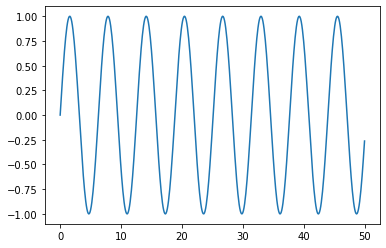

In [8]:
plt.plot(x,y)

In [9]:
df = pd.DataFrame(data=y,index=x,columns=['Sine'])

In [10]:
df.head()

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418


In [11]:
np.sin(0.3)

0.29552020666133955

In [12]:
len(df)

501

In [13]:
test_percent = 0.1

In [14]:
test_point = np.round(len(df)*test_percent)

In [15]:
test_point

50.0

In [16]:
test_ind = int(len(df)-test_point)

In [17]:
test_ind

451

In [18]:
train = df.iloc[:test_ind]
test  = df.iloc[test_ind:]

In [19]:
train.shape

(451, 1)

In [20]:
df.shape

(501, 1)

In [21]:
test.shape

(50, 1)

<AxesSubplot:>

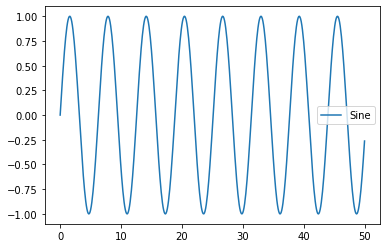

In [22]:
df.plot()

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()

In [25]:
scaler.fit(train)

MinMaxScaler()

In [26]:
scaled_train = scaler.transform(train)
scaled_test  = scaler.transform(test)

In [27]:
scaled_train.max()

0.9999999999999999

In [28]:
scaled_train.min()

0.0

In [29]:
train.max()

Sine    0.999994
dtype: float64

In [30]:
train.min()

Sine   -0.99999
dtype: float64

In [31]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [32]:
length = 50
batch_size = 1
generator = TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=batch_size)

In [33]:
len(scaled_train)

451

In [34]:
len(generator)

401

In [35]:
scaled_train.shape

(451, 1)

In [36]:
generator[0]

(array([[[4.99999116e-01],
         [5.49916225e-01],
         [5.99334579e-01],
         [6.47760405e-01],
         [6.94709850e-01],
         [7.39713809e-01],
         [7.82322618e-01],
         [8.22110545e-01],
         [8.58680040e-01],
         [8.91665714e-01],
         [9.20737985e-01],
         [9.45606372e-01],
         [9.66022399e-01],
         [9.81782075e-01],
         [9.92727935e-01],
         [9.98750612e-01],
         [9.99789928e-01],
         [9.95835500e-01],
         [9.86926839e-01],
         [9.73152957e-01],
         [9.54651478e-01],
         [9.31607263e-01],
         [9.04250562e-01],
         [8.72854714e-01],
         [8.37733417e-01],
         [7.99237589e-01],
         [7.57751870e-01],
         [7.13690771e-01],
         [6.67494535e-01],
         [6.19624741e-01],
         [5.70559686e-01],
         [5.20789614e-01],
         [4.70811810e-01],
         [4.21125636e-01],
         [3.72227539e-01],
         [3.24606094e-01],
         [2.78737119e-01],
 

In [37]:
generator[1]

(array([[[5.49916225e-01],
         [5.99334579e-01],
         [6.47760405e-01],
         [6.94709850e-01],
         [7.39713809e-01],
         [7.82322618e-01],
         [8.22110545e-01],
         [8.58680040e-01],
         [8.91665714e-01],
         [9.20737985e-01],
         [9.45606372e-01],
         [9.66022399e-01],
         [9.81782075e-01],
         [9.92727935e-01],
         [9.98750612e-01],
         [9.99789928e-01],
         [9.95835500e-01],
         [9.86926839e-01],
         [9.73152957e-01],
         [9.54651478e-01],
         [9.31607263e-01],
         [9.04250562e-01],
         [8.72854714e-01],
         [8.37733417e-01],
         [7.99237589e-01],
         [7.57751870e-01],
         [7.13690771e-01],
         [6.67494535e-01],
         [6.19624741e-01],
         [5.70559686e-01],
         [5.20789614e-01],
         [4.70811810e-01],
         [4.21125636e-01],
         [3.72227539e-01],
         [3.24606094e-01],
         [2.78737119e-01],
         [2.35078919e-01],
 

### Create the model

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM

In [39]:
n_features = 1

In [40]:
model = Sequential()

In [41]:
model.add(SimpleRNN(50,input_shape=(length,n_features)))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50)                2600      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.fit_generator(generator,epochs=5)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
401/401 [==============================] - 5s 13ms/step - loss: 0.0049
Epoch 2/5
401/401 [==============================] - 6s 15ms/step - loss: 1.2642e-04
Epoch 3/5
401/401 [==============================] - 6s 15ms/step - loss: 3.8564e-04
Epoch 4/5
401/401 [==============================] - 6s 16ms/step - loss: 1.5136e-04
Epoch 5/5
401/401 [==============================] - 6s 16ms/step - loss: 2.7429e-05


In [44]:
model.history.history.keys()

dict_keys(['loss'])

In [45]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

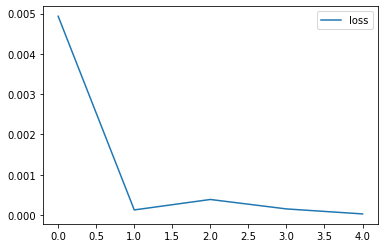

In [46]:
losses.plot()

### Evaluate on test Data

In [47]:
first_eval_batch = scaled_train[-length:]

In [48]:
first_eval_batch

array([[8.37405820e-01],
       [7.98881698e-01],
       [7.57371240e-01],
       [7.13289205e-01],
       [6.67076045e-01],
       [6.19193508e-01],
       [5.70120021e-01],
       [5.20345908e-01],
       [4.70368497e-01],
       [4.20687145e-01],
       [3.71798252e-01],
       [3.24190300e-01],
       [2.78338972e-01],
       [2.34702398e-01],
       [1.93716581e-01],
       [1.55791039e-01],
       [1.21304709e-01],
       [9.06021693e-02],
       [6.39901882e-02],
       [4.17346643e-02],
       [2.40579672e-02],
       [1.11367167e-02],
       [3.10001778e-03],
       [2.81703720e-05],
       [1.95186738e-03],
       [8.85188786e-03],
       [2.06592891e-02],
       [3.72560954e-02],
       [5.84764771e-02],
       [8.41084070e-02],
       [1.13895779e-01],
       [1.47540969e-01],
       [1.84707803e-01],
       [2.25024924e-01],
       [2.68089497e-01],
       [3.13471233e-01],
       [3.60716695e-01],
       [4.09353821e-01],
       [4.58896644e-01],
       [5.08850150e-01],


In [49]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))

In [50]:
first_eval_batch.shape

(1, 50, 1)

In [51]:
pred = model.predict(first_eval_batch)

In [52]:
print(pred)
print(pred[0])

[[0.9504883]]
[0.9504883]


In [53]:
scaled_test[0]

array([0.94955134])

In [54]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
    
    current_pred = model.predict(current_batch)[0]
    
    test_predictions.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [55]:
test_predictions

[array([0.9504883], dtype=float32),
 array([0.96972936], dtype=float32),
 array([0.9839316], dtype=float32),
 array([0.993033], dtype=float32),
 array([0.996888], dtype=float32),
 array([0.9956005], dtype=float32),
 array([0.98925865], dtype=float32),
 array([0.97778964], dtype=float32),
 array([0.961378], dtype=float32),
 array([0.9404954], dtype=float32),
 array([0.91534793], dtype=float32),
 array([0.88616425], dtype=float32),
 array([0.8532768], dtype=float32),
 array([0.81690115], dtype=float32),
 array([0.7773789], dtype=float32),
 array([0.735287], dtype=float32),
 array([0.6909341], dtype=float32),
 array([0.6444751], dtype=float32),
 array([0.59648025], dtype=float32),
 array([0.5473883], dtype=float32),
 array([0.4976658], dtype=float32),
 array([0.44782364], dtype=float32),
 array([0.39840811], dtype=float32),
 array([0.3498719], dtype=float32),
 array([0.30276662], dtype=float32),
 array([0.25760925], dtype=float32),
 array([0.21493912], dtype=float32),
 array([0.17512134],

In [56]:
scaled_test

array([[9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],
       [7.50127132e-01],
       [7.05655314e-01],
       [6.59128649e-01],
       [6.11012013e-01],
       [5.61786173e-01],
       [5.11942978e-01],
       [4.61980443e-01],
       [4.12397778e-01],
       [3.63690397e-01],
       [3.16344967e-01],
       [2.70834550e-01],
       [2.27613868e-01],
       [1.87114770e-01],
       [1.49741909e-01],
       [1.15868702e-01],
       [8.58335998e-02],
       [5.99367021e-02],
       [3.84367625e-02],
       [2.15486014e-02],
       [9.44095974e-03],
       [2.23481297e-03],
       [2.16257798e-06],
       [2.76531647e-03],
       [1.04966661e-02],
       [2.31189624e-02],


In [57]:
true_predictions = scaler.inverse_transform(test_predictions)

In [58]:
true_predictions[:2]

array([[0.9009712 ],
       [0.93945296]])

In [59]:
test.head()

,Sine
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591


In [60]:
test['Predictions'] = true_predictions

<ipython-input-60-920b79c3c314>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [61]:
test.head()

,Sine,Predictions
45.1,0.899097,0.900971
45.2,0.938307,0.939453
45.3,0.968142,0.967857
45.4,0.988304,0.986060
45.5,0.998591,0.993770


<AxesSubplot:>

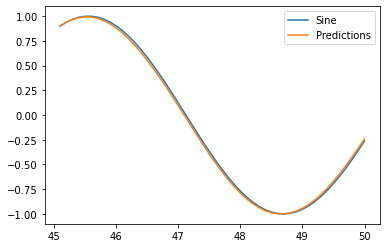

In [62]:
test.plot()

### EarlyStopping and validation Generator

In [63]:
from tensorflow.keras.callbacks import EarlyStopping

In [64]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [65]:
length = 49
generator = TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=1)

validation_generator = TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size=1)

In [66]:
model = Sequential()

model.add(LSTM(50,input_shape=(length,n_features)))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [67]:
model.fit_generator(generator,epochs=20,validation_data=validation_generator,callbacks=[early_stop])

Epoch 1/20
402/402 [==============================] - 12s 29ms/step - loss: 0.0155 - val_loss: 4.1500e-05
Epoch 2/20
402/402 [==============================] - 11s 26ms/step - loss: 9.5348e-05 - val_loss: 2.0004e-06
Epoch 3/20
402/402 [==============================] - 11s 27ms/step - loss: 6.2513e-05 - val_loss: 6.5380e-06
Epoch 4/20
402/402 [==============================] - 12s 29ms/step - loss: 3.5719e-04 - val_loss: 1.5060e-04


In [68]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
    
    current_pred = model.predict(current_batch)[0]
    
    test_predictions.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

<ipython-input-69-1b2b95a3ee59>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LSTM predictions'] = true_predictions


<AxesSubplot:>

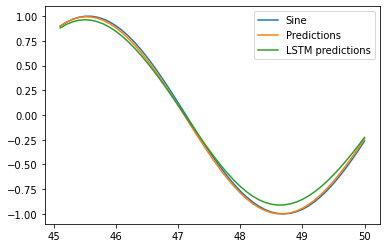

In [69]:
true_predictions = scaler.inverse_transform(test_predictions)
test['LSTM predictions'] = true_predictions

test.plot()

In [70]:
#Forecasting

full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [71]:
length = 50
generator = TimeseriesGenerator(scaled_full_data,scaled_full_data,length=length,batch_size=1)

In [72]:
model = Sequential()

model.add(LSTM(50,input_shape=(length,n_features)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
model.fit_generator(generator,epochs=6)

Epoch 1/6
451/451 [==============================] - 11s 25ms/step - loss: 0.0087
Epoch 2/6
451/451 [==============================] - 12s 26ms/step - loss: 1.5652e-04
Epoch 3/6
451/451 [==============================] - 13s 29ms/step - loss: 9.0839e-05
Epoch 4/6
451/451 [==============================] - 13s 30ms/step - loss: 1.5920e-04
Epoch 5/6
451/451 [==============================] - 13s 29ms/step - loss: 7.5807e-05
Epoch 6/6
451/451 [==============================] - 12s 28ms/step - loss: 5.3468e-04


In [74]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape(1,length,n_features)

for i in range(len(test)):
    
    current_pred = model.predict(current_batch)[0]
    
    forecast.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [75]:
forecast = scaler.inverse_transform(forecast)

In [76]:
len(forecast)

50

In [77]:
50*0.1

5.0

In [85]:
forecast_index = np.arange(50.1,55.1,step=0.1)

In [86]:
forecast_index

array([50.1, 50.2, 50.3, 50.4, 50.5, 50.6, 50.7, 50.8, 50.9, 51. , 51.1,
       51.2, 51.3, 51.4, 51.5, 51.6, 51.7, 51.8, 51.9, 52. , 52.1, 52.2,
       52.3, 52.4, 52.5, 52.6, 52.7, 52.8, 52.9, 53. , 53.1, 53.2, 53.3,
       53.4, 53.5, 53.6, 53.7, 53.8, 53.9, 54. , 54.1, 54.2, 54.3, 54.4,
       54.5, 54.6, 54.7, 54.8, 54.9, 55. ])

In [87]:
#np.round(np.linspace(50.1,55,50),1) can also be used

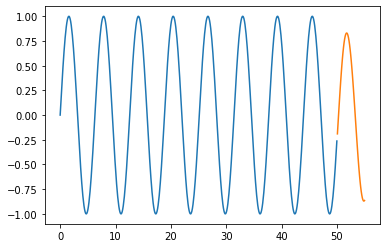

In [89]:
plt.plot(df.index,df['Sine'])
plt.plot(forecast_index,forecast)